In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [47]:
# read csv
df = pd.read_csv("water_potability.csv")

In [48]:
df.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [49]:
# performing EDA
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [50]:
# exploring missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

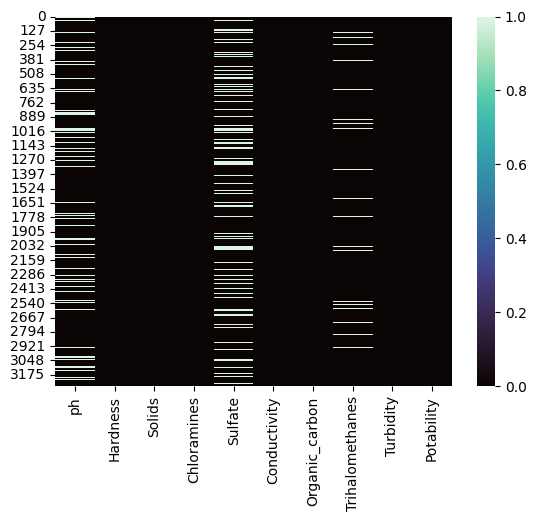

In [51]:
# heatmap
sns.heatmap(df.isnull(), cmap="mako")

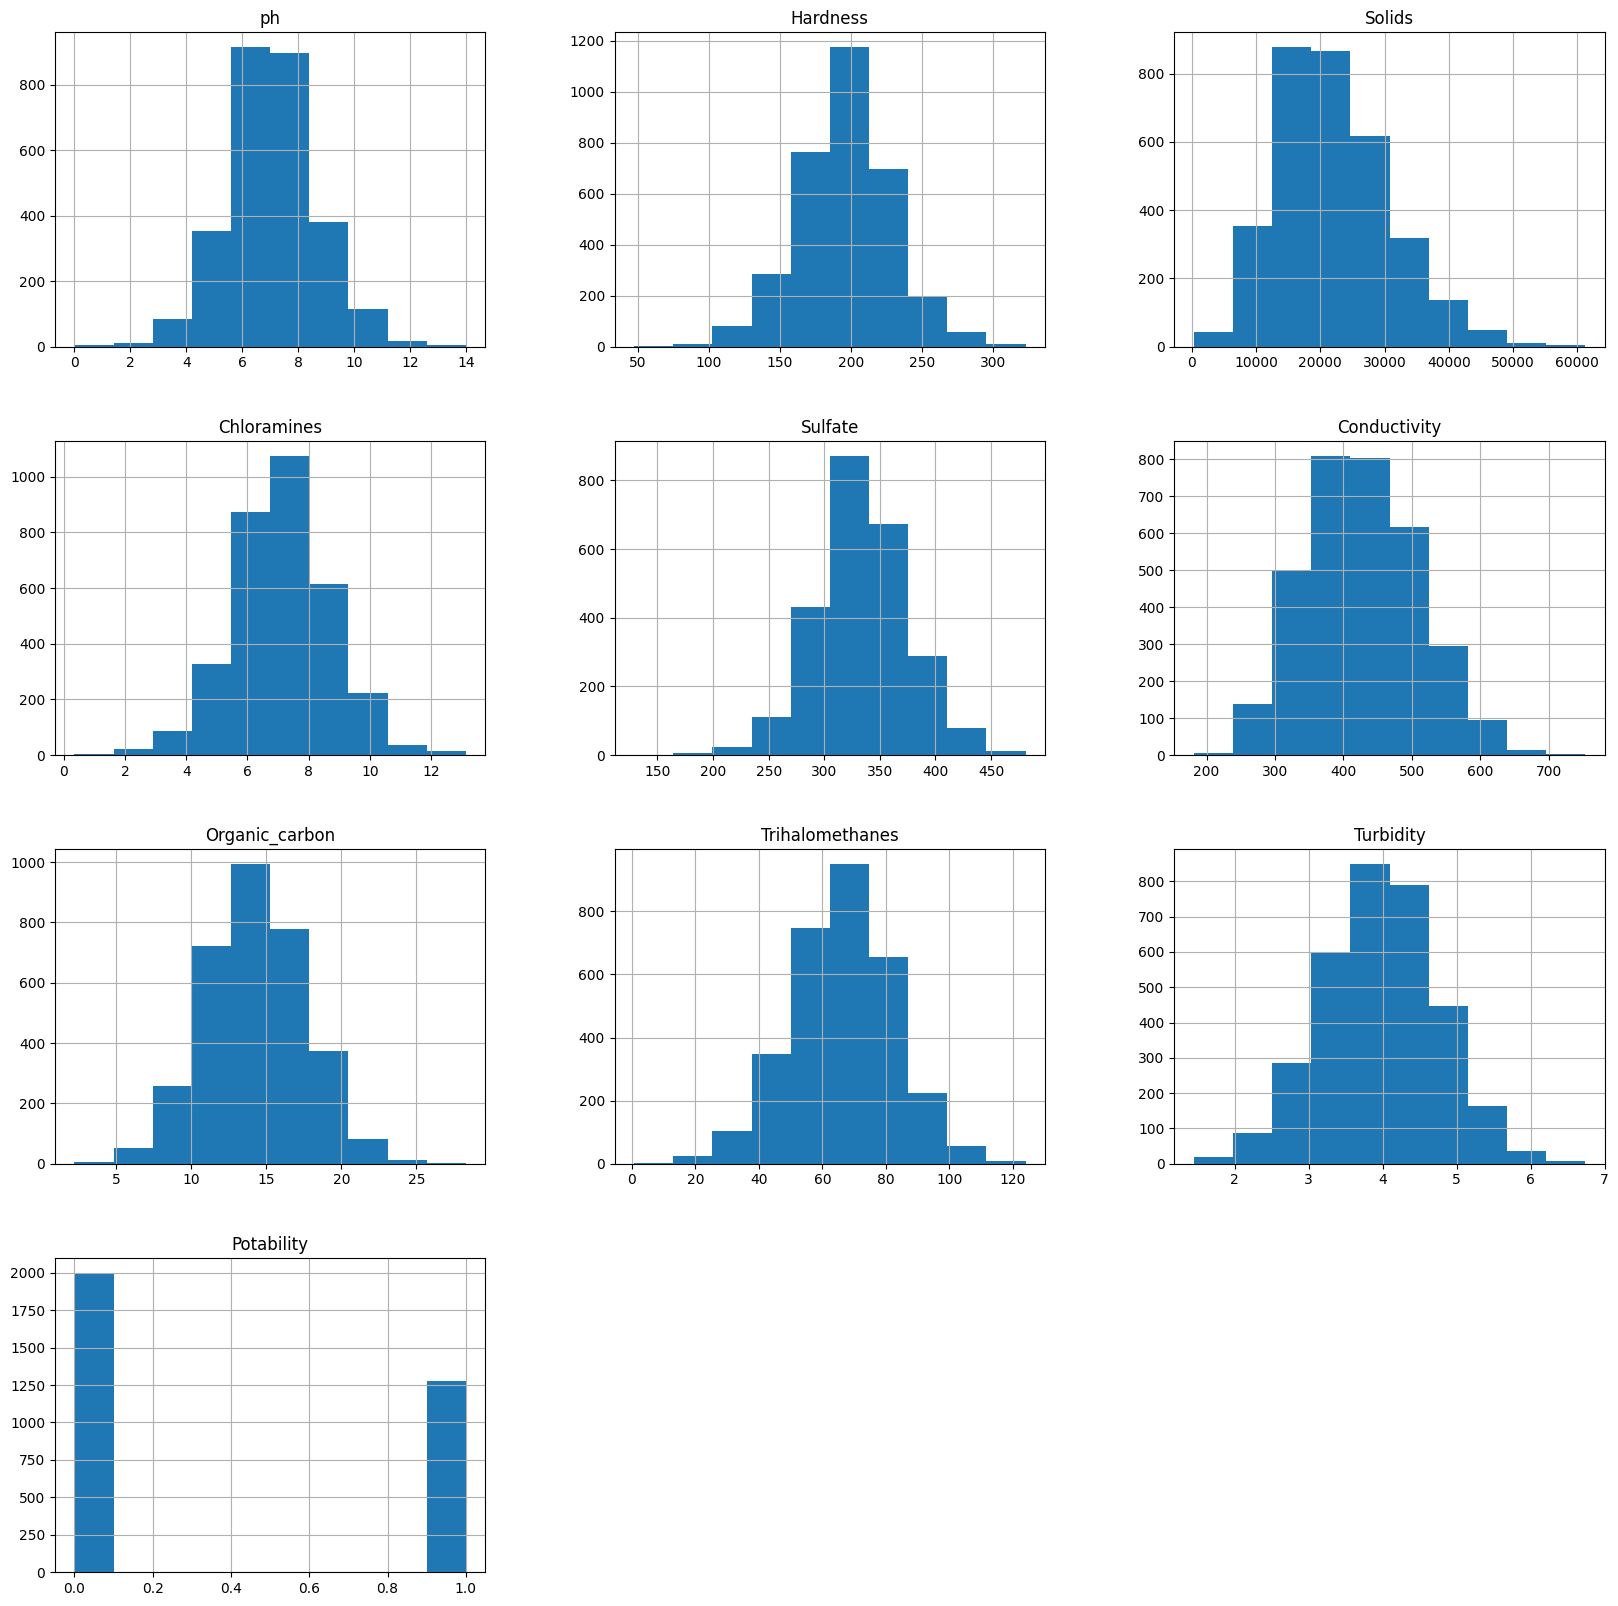

In [52]:
# Visualize key features using histograms, box plots, scatter plots, or other appropriate visualization techniques to identify patterns, and outliers
df.hist(figsize=(20, 20))
plt.show()

ph                    Axes(0.125,0.712609;0.168478x0.167391)
Hardness           Axes(0.327174,0.712609;0.168478x0.167391)
Solids             Axes(0.529348,0.712609;0.168478x0.167391)
Chloramines        Axes(0.731522,0.712609;0.168478x0.167391)
Sulfate               Axes(0.125,0.511739;0.168478x0.167391)
Conductivity       Axes(0.327174,0.511739;0.168478x0.167391)
Organic_carbon     Axes(0.529348,0.511739;0.168478x0.167391)
Trihalomethanes    Axes(0.731522,0.511739;0.168478x0.167391)
Turbidity              Axes(0.125,0.31087;0.168478x0.167391)
Potability          Axes(0.327174,0.31087;0.168478x0.167391)
dtype: object

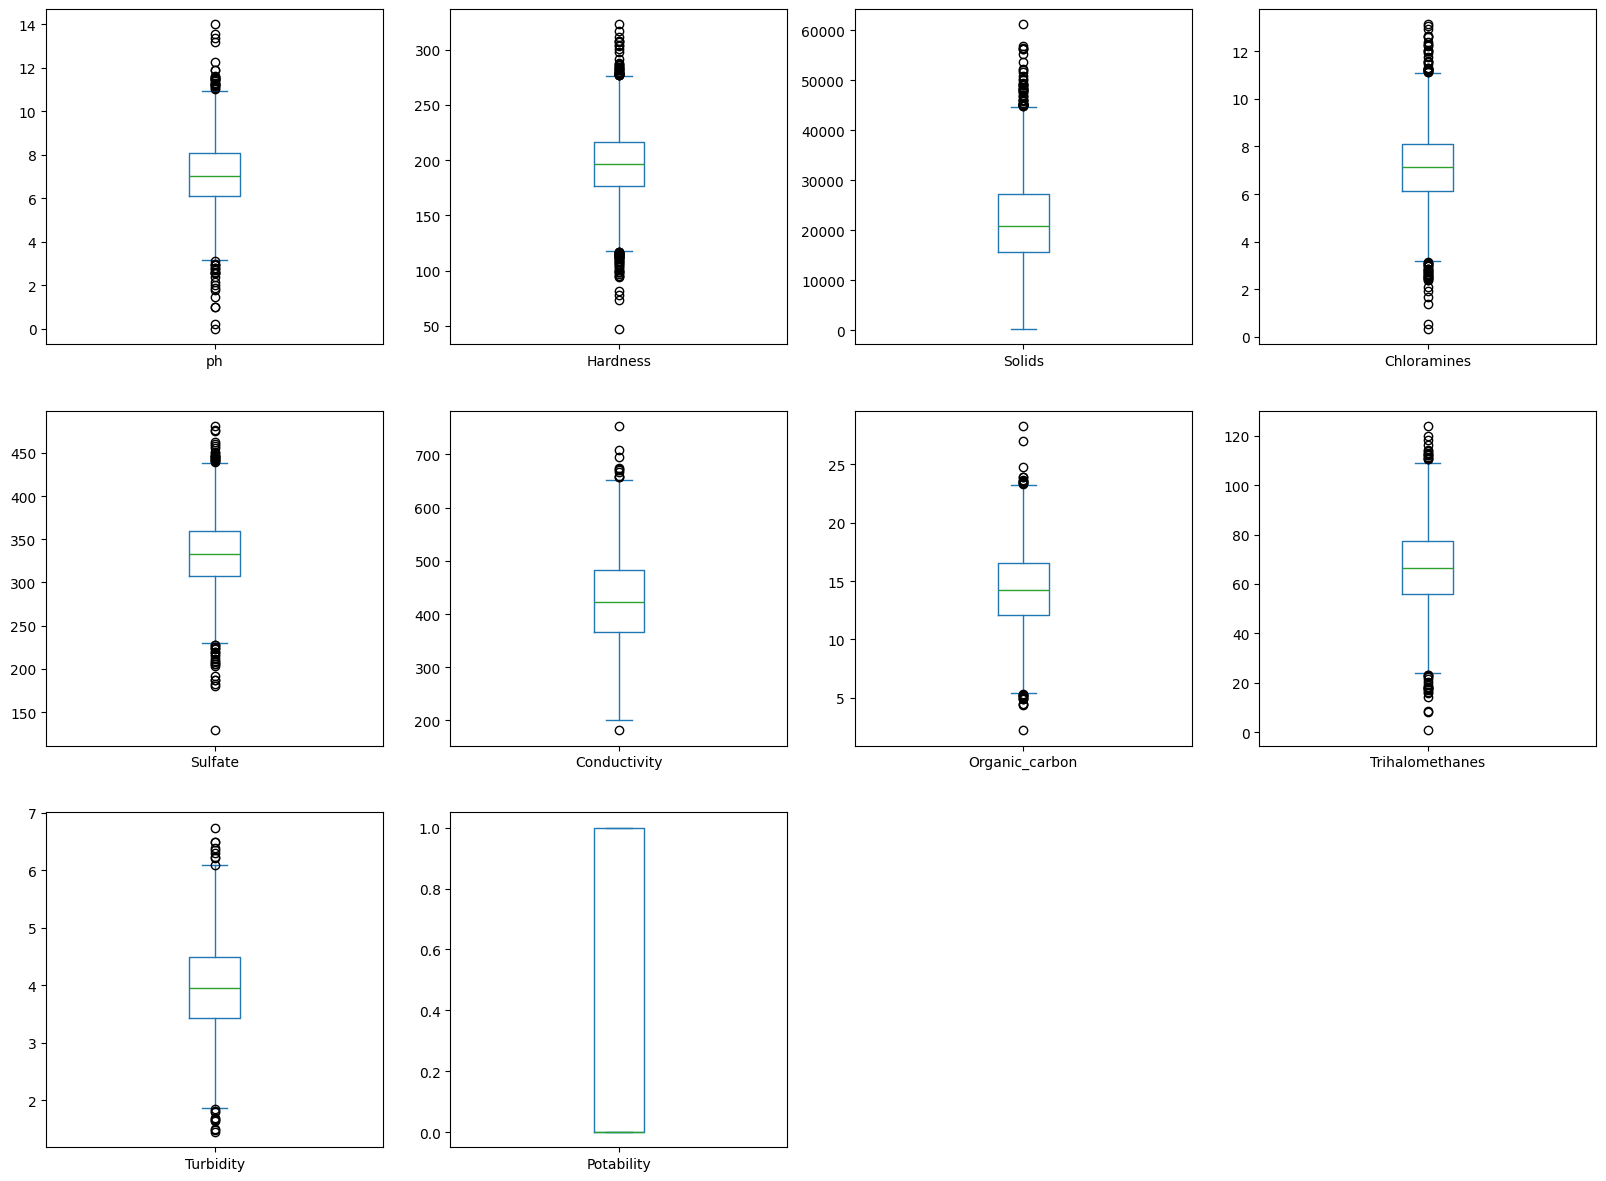

In [53]:
# boxplot of all columns, shown in one plot
df.plot(
    kind="box",
    subplots=True,
    layout=(4, 4),
    sharex=False,
    sharey=False,
    figsize=(20, 20),
)

In [54]:
# interpolate missing values
df.interpolate(method="polynomial", order=2, inplace=True)
# fill border values not catered by interpolation via mean
df.fillna(df.mean(), inplace=True)
# check if there are any missing values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [55]:
# getting the quartile one and quartile 3 values of each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# finally calculating the interquartile range IQR
IQR = Q3 - Q1
IQR

ph                     2.011660
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               52.355534
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       21.657377
Turbidity              1.060609
Potability             1.000000
dtype: float64

In [56]:
# if the values fall behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR,
# then it is been defined as outlier
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

ph                 60
Hardness           83
Solids             47
Chloramines        61
Sulfate            65
Conductivity       11
Organic_carbon     25
Trihalomethanes    36
Turbidity          19
Potability          0
dtype: int64

In [57]:
# masking the outliers
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
mask

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,True,False,False,False,False,False,False,False
3272,False,False,False,False,False,False,False,False,False,False
3273,False,False,False,False,False,False,False,False,False,False
3274,False,False,False,False,False,False,False,False,False,False


In [58]:
# next we will replace the outliers with the median of the column
df = df.mask(mask, df.median(), axis=1)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.052837,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,392.389606,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,388.512838,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,20927.833607,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.292738,392.449580,19.903225,67.459280,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.292738,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.292738,402.883113,11.168946,77.488213,4.708658,1


In [59]:
# check outliers
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

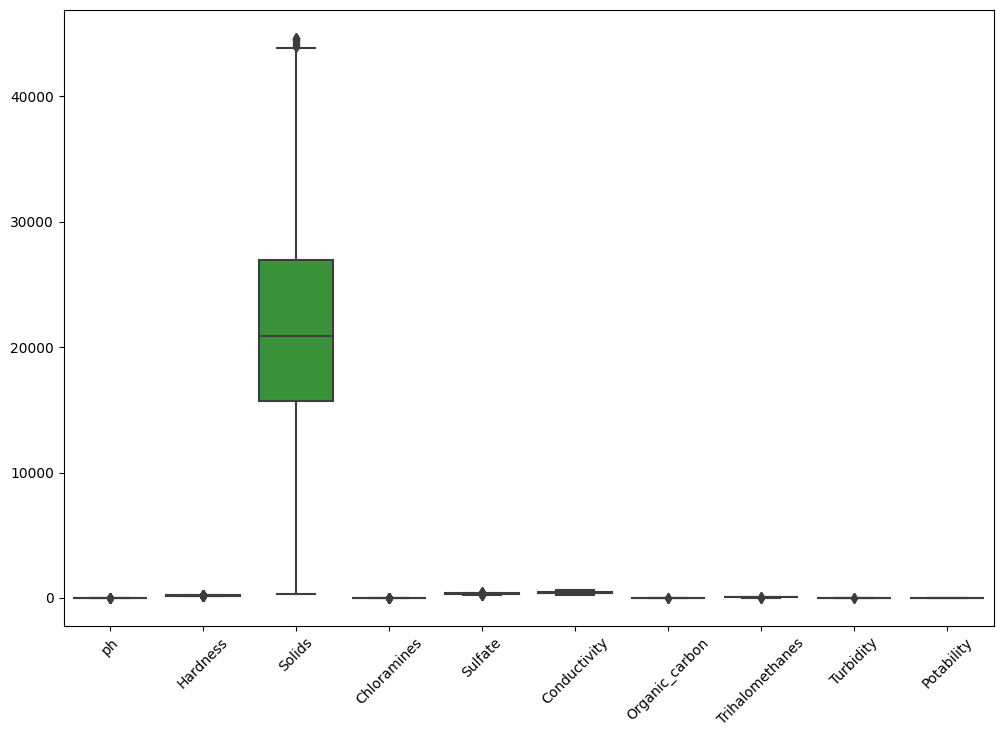

In [60]:
# Plot box plots for summary statistics of numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

ph                    Axes(0.125,0.712609;0.168478x0.167391)
Hardness           Axes(0.327174,0.712609;0.168478x0.167391)
Solids             Axes(0.529348,0.712609;0.168478x0.167391)
Chloramines        Axes(0.731522,0.712609;0.168478x0.167391)
Sulfate               Axes(0.125,0.511739;0.168478x0.167391)
Conductivity       Axes(0.327174,0.511739;0.168478x0.167391)
Organic_carbon     Axes(0.529348,0.511739;0.168478x0.167391)
Trihalomethanes    Axes(0.731522,0.511739;0.168478x0.167391)
Turbidity              Axes(0.125,0.31087;0.168478x0.167391)
Potability          Axes(0.327174,0.31087;0.168478x0.167391)
dtype: object

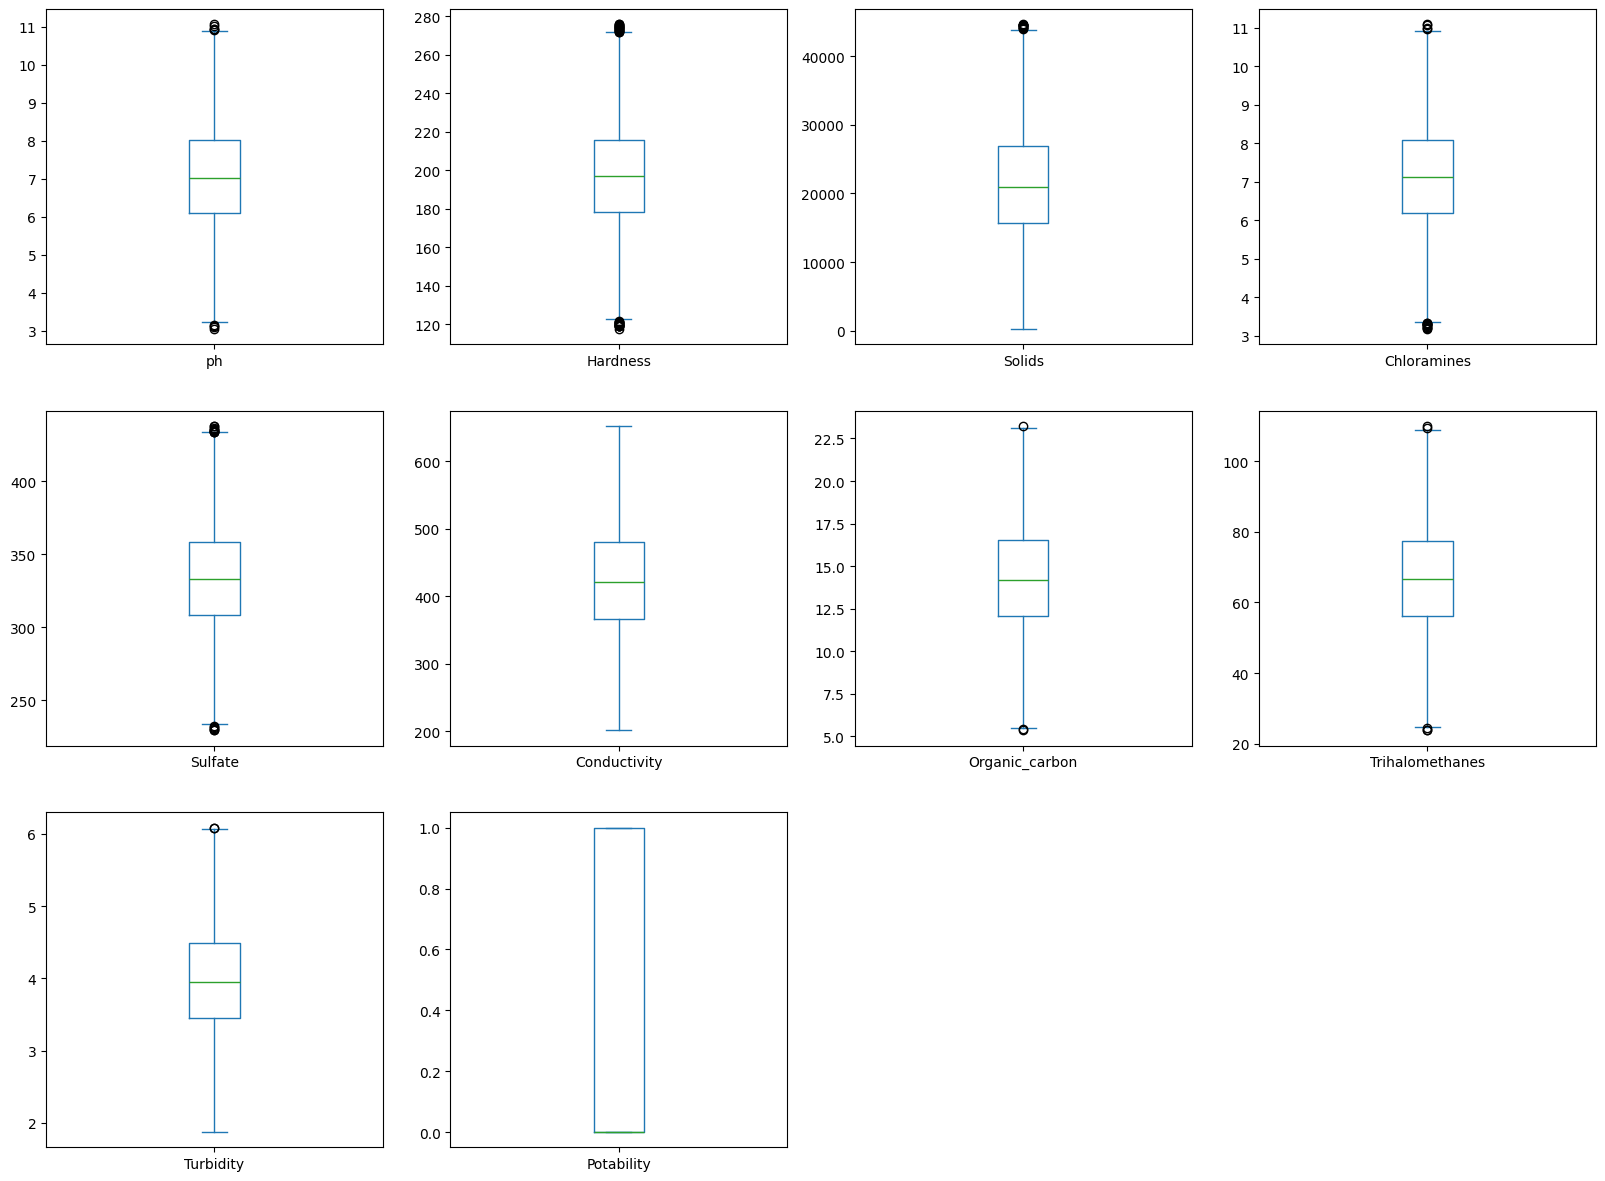

In [61]:
# boxplot of all columns, shown in one plot
df.plot(
    kind="box",
    subplots=True,
    layout=(4, 4),
    sharex=False,
    sharey=False,
    figsize=(20, 20),
)

In [64]:
# Rescale the data
for column in df.columns:
    mean = df[column].mean()
    std = df[column].std()
    df[column] = (df[column] - mean) / std

df.describe()
# In this code, we first calculate the mean and standard deviation of each column, then subtract the mean from each value and divide by the standard deviation. This transforms the data in each column to have a mean of 0 and a standard deviation of 1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000,3.276000e+03,3.276000e+03
mean,-9.760202e-18,6.506802e-18,-1.735147e-17,8.675735e-18,-1.301360e-17,3.253401e-18,1.301360e-17,0.000000,8.675735e-18,1.561632e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-2.703498e+00,-2.677667e+00,-2.616562e+00,-2.726714e+00,-2.683599e+00,-2.817708e+00,-2.794287e+00,-2.764899,-2.758177e+00,-7.996527e-01
25%,-6.535701e-01,-6.223159e-01,-7.308401e-01,-6.525669e-01,-6.468285e-01,-7.510995e-01,-6.862653e-01,-0.669864,-6.877546e-01,-7.996527e-01
50%,-3.229788e-02,1.525002e-02,-8.468717e-02,4.925898e-03,-1.554597e-02,-4.532446e-02,-2.102912e-02,0.007060,-1.599271e-02,-7.996527e-01
75%,6.448839e-01,6.487345e-01,6.566110e-01,6.591329e-01,6.410094e-01,6.969146e-01,6.988325e-01,0.692966,6.943613e-01,1.250161e+00
max,2.705174e+00,2.699409e+00,2.830989e+00,2.741485e+00,2.679726e+00,2.857801e+00,2.802339e+00,2.806552,2.787146e+00,1.250161e+00


In [ ]:
def split_data(df, test_size=0.2):
    # Shuffle the data
    df = df.sample(frac=1).reset_index(drop=True)

    # Calculate the index at which to split the data
    split_idx = int(len(df) * (1 - test_size))

    # Split the data
    train_df = df.loc[:split_idx]
    test_df = df.loc[split_idx:]

    return train_df, test_df


# Use the function to split the data
train_df, test_df = split_data(df, test_size=0.2)

# For deep learning model, split the training data into training and validation sets
train_df, val_df = split_data(
    train_df, test_size=0.25
)  # 0.25 x 0.8 = 0.2, so 60% data is used for training